In [8]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [2]:
data = pd.read_csv("bladder_cancer.csv")
data = data.dropna()
data.isnull().sum()
X = data.drop(columns=['Label'], axis=1)
y = data['Label']
train_feature, test_feature, train_label, test_label = train_test_split(X, y, test_size = 0.2,random_state=0)

In [3]:
scaler = StandardScaler()
scaler.fit(train_feature)
train_feature_scaled = scaler.transform(train_feature)
test_feature_scaled = scaler.transform(test_feature)

In [17]:
RFC = RandomForestClassifier(random_state=0)
n_estimators = list(range(10, 110, 10))
max_depth = list(range(6, 26, 2))
params = { 'n_estimators' : n_estimators,
           'max_depth' : max_depth,
           }
grid = GridSearchCV(RFC, param_grid= params, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(train_feature_scaled, train_label)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [18]:
best_parameter=grid.best_estimator_
print(grid_search.best_params_)
print("best_score:", grid.best_score_)

{'max_depth': 10, 'n_estimators': 50}
best_score: 0.9149359886201992


In [19]:
predictions_test_set = best_parameter.predict(test_feature_scaled)

accuracy_score(test_label, predictions_test_set)

0.8541666666666666

In [20]:
results_df = pd.DataFrame(grid.cv_results_)
df_mean=results_df['mean_test_score']
df_mean

0     0.834993
1     0.883073
2     0.888336
3     0.899004
4     0.914794
        ...   
95    0.899004
96    0.899004
97    0.899147
98    0.909815
99    0.909815
Name: mean_test_score, Length: 100, dtype: float64

In [21]:
df_pivot_mean=results_df.pivot_table(values = 'mean_test_score', index='param_max_depth', columns ='param_n_estimators')
df_pivot_mean

param_n_estimators,10,20,30,40,50,60,70,80,90,100
param_max_depth,,,,,,,,,,
6,0.834993,0.883073,0.888336,0.899004,0.914794,0.899004,0.888478,0.888478,0.899147,0.899147
8,0.861878,0.883215,0.899147,0.909673,0.909673,0.904267,0.899147,0.899147,0.904552,0.909815
10,0.851209,0.877952,0.888478,0.899004,0.914936,0.899004,0.904410,0.899147,0.909815,0.909815
12,0.851209,0.877952,0.888478,0.899004,0.914936,0.899004,0.899004,0.899147,0.909815,0.909815
14,0.851209,0.877952,0.888478,0.899004,0.914936,0.899004,0.899004,0.899147,0.909815,0.909815
16,0.851209,0.877952,0.888478,0.899004,0.914936,0.899004,0.899004,0.899147,0.909815,0.909815
18,0.851209,0.877952,0.888478,0.899004,0.914936,0.899004,0.899004,0.899147,0.909815,0.909815
20,0.851209,0.877952,0.888478,0.899004,0.914936,0.899004,0.899004,0.899147,0.909815,0.909815
22,0.851209,0.877952,0.888478,0.899004,0.914936,0.899004,0.899004,0.899147,0.909815,0.909815


(10, 10)
(10, 10)
(10, 10)


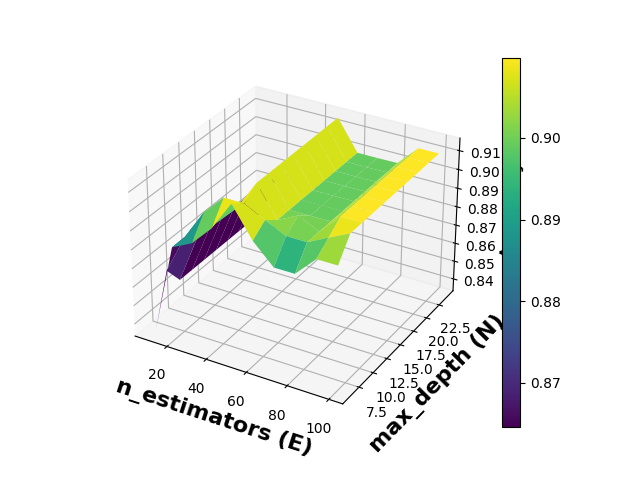

In [22]:
%matplotlib widget 
# forInteractive figures 

fig=plt.figure(5)
ax = plt.axes(projection='3d')
ax.set_xlabel('n_estimators (E)', fontsize=16,  fontdict=dict(weight='bold'))
ax.set_ylabel('max_depth (N)', fontsize=16,  fontdict=dict(weight='bold'))
ax.set_zlabel('Accuracy', fontsize=16)

n_estimators, max_depth = np.meshgrid(n_estimators, max_depth)
print(n_estimators.shape)
print(max_depth.shape)
print(df_pivot_mean.shape)
graph = ax.plot_surface(n_estimators, max_depth,df_pivot_mean,cmap=cm.viridis)
fig.colorbar(graph,ax=ax)